<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamin Villaseca
- Nombre de alumno 2: Lucas Alvarez P.


### **Link de repositorio de GitHub:** https://github.com/lucasssalvarez11/lucasssalvarez11

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Lab Programacion Cientifica /Laboratorios /Lab7/diabetes_data.csv'

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv(ruta)
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [1]:
from sklearn.datasets import fetch_openml

In [ ]:
!pip install xgboost

In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [7]:
# Contamos los valores unicos por feature
categorical_features = df.columns
for col in categorical_features:
    print(f"Cantidad de valores unicos en '{col}': {df[col].nunique()}")

Cantidad de valores unicos en 'Age': 13
Cantidad de valores unicos en 'Sex': 2
Cantidad de valores unicos en 'HighChol': 2
Cantidad de valores unicos en 'CholCheck': 2
Cantidad de valores unicos en 'BMI': 80
Cantidad de valores unicos en 'Smoker': 2
Cantidad de valores unicos en 'HeartDiseaseorAttack': 2
Cantidad de valores unicos en 'PhysActivity': 2
Cantidad de valores unicos en 'Fruits': 2
Cantidad de valores unicos en 'Veggies': 2
Cantidad de valores unicos en 'HvyAlcoholConsump': 2
Cantidad de valores unicos en 'GenHlth': 5
Cantidad de valores unicos en 'MentHlth': 31
Cantidad de valores unicos en 'PhysHlth': 31
Cantidad de valores unicos en 'DiffWalk': 2
Cantidad de valores unicos en 'Stroke': 2
Cantidad de valores unicos en 'HighBP': 2
Cantidad de valores unicos en 'Diabetes': 2


Como queremos priorizar la interpretabilidad mantendremos la columna de edad como ya esta, pero las columnas de "BMI", "GenHlth", "MentHlth" y "PhysHlth" si le realizaremos transformaciones ya de por si no presentan una gran interpretabilidad. Por lo que para estos datos relizaremos la transformacion de MinMaxScaler para mantener la distribucion de los datos.  

Separamos los datos de entrenamiento

In [8]:
from sklearn.model_selection import train_test_split

target = 'Diabetes'

# Separar variables
X = df.drop(columns=[target])
y = df[target]

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42,
    stratify=y
)

Tamaño de entrenamiento: (47128, 17)
Tamaño de prueba: (23564, 17)


Column transformer

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas que se escalarán con MinMaxScaler
features_to_scale = ["BMI", "GenHlth", "MentHlth", "PhysHlth"]

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("minmax", MinMaxScaler(), features_to_scale)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Fijar salida en formato pandas
preprocessor.set_output(transform="pandas")

# Aplicar el preprocesamiento a los datos de entrenamiento
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print(X_train_scaled.head())

            BMI  GenHlth  MentHlth  PhysHlth   Age  Sex  HighChol  CholCheck  \
70619  0.235294     0.50  0.000000  0.000000   8.0  1.0       0.0        1.0   
69410  0.188235     0.75  0.000000  0.133333  11.0  1.0       1.0        1.0   
51727  0.188235     0.50  0.000000  0.000000   5.0  0.0       0.0        1.0   
33196  0.211765     0.50  0.000000  0.000000   6.0  1.0       0.0        1.0   
54973  0.223529     0.25  0.333333  0.000000  12.0  1.0       1.0        1.0   

       Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
70619     1.0                   0.0           0.0     1.0      0.0   
69410     0.0                   0.0           1.0     1.0      1.0   
51727     0.0                   0.0           1.0     1.0      1.0   
33196     0.0                   0.0           0.0     0.0      1.0   
54973     1.0                   0.0           1.0     1.0      1.0   

       HvyAlcoholConsump  DiffWalk  Stroke  HighBP  
70619                1.0       0.0     0.0   

pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb)
])

# Entrenamiento
pipe.fit(X_train, y_train)

# Predicción y reporte
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.7747    0.7017    0.7364     11782
         1.0     0.7274    0.7959    0.7601     11782

    accuracy                         0.7488     23564
   macro avg     0.7510    0.7488    0.7483     23564
weighted avg     0.7510    0.7488    0.7483     23564



En este caso, la métrica más importante es el recall (sensibilidad) de la clase positiva, ya que mide la capacidad del modelo para detectar correctamente a las personas que realmente tienen diabetes. Un recall alto (0.80 en este caso) significa que el modelo comete pocos falsos negativos, es decir, minimiza los casos en los que predice que alguien no tiene diabetes cuando en realidad sí la tiene, lo cual es crucial en contextos médicos donde no detectar un caso puede tener consecuencias graves.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

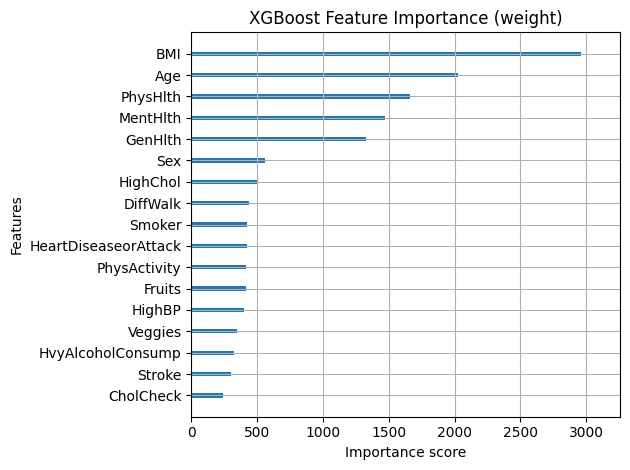

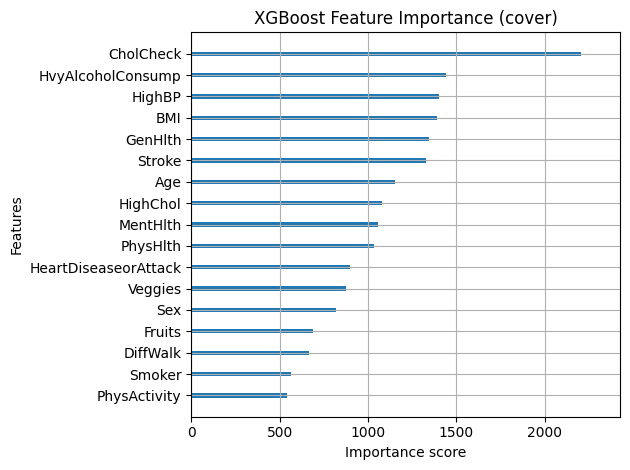

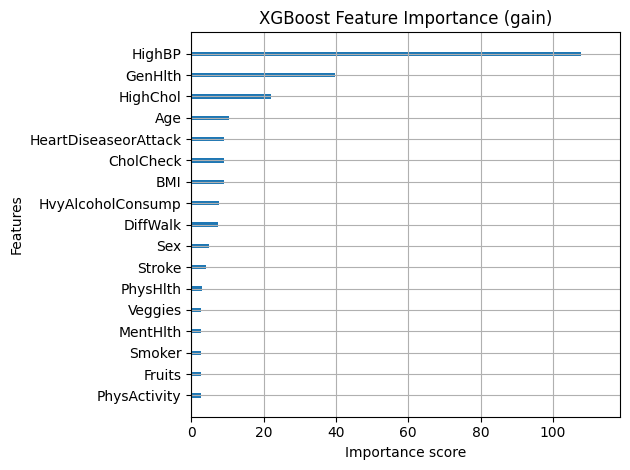


Tabla consolidada de importancias (top 30 por gain):


importance_type,feature,weight,cover,gain
16,HighBP,399.0,1404.393677,107.808304
1,GenHlth,1326.0,1347.673462,39.831921
6,HighChol,498.0,1078.865479,22.042110
4,Age,2025.0,1152.513062,10.423720
9,HeartDiseaseorAttack,419.0,895.578430,9.091652
7,CholCheck,241.0,2205.776123,9.088836
0,BMI,2961.0,1392.265747,8.942047
13,HvyAlcoholConsump,321.0,1443.291138,7.677548
14,DiffWalk,436.0,667.171631,7.447000
5,Sex,561.0,818.198608,4.864068


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_importance

xgb_model = pipe.named_steps["model"]
booster = xgb_model.get_booster()

try:
    feat_names = pipe.named_steps["preprocess"].get_feature_names_out()
    booster.feature_names = list(feat_names)
except Exception:
    feat_names = None

importance_types = ["weight", "cover", "gain"]

for imp_type in importance_types:
    ax = plot_importance(
        booster,
        importance_type=imp_type,
        max_num_features=20,
        show_values=False
    )
    plt.title(f"XGBoost Feature Importance ({imp_type})")
    plt.tight_layout()
    plt.show()

def _map_feature_names(score_dict, names):
    """
    Convierte claves tipo 'f12' a nombres reales cuando sea posible.
    Si ya son nombres, los deja igual.
    """
    if not score_dict:
        return pd.Series(dtype=float)
    s = pd.Series(score_dict, dtype=float)
    if names is not None:
        # Si las llaves son f0, f1, ... mapeamos por índice
        new_index = []
        for k in s.index:
            if k.startswith("f") and k[1:].isdigit():
                idx = int(k[1:])
                if 0 <= idx < len(names):
                    new_index.append(names[idx])
                else:
                    new_index.append(k)
            else:
                new_index.append(k)
        s.index = new_index
    return s

imp_tables = {}
for imp_type in importance_types:
    raw = booster.get_score(importance_type=imp_type)
    imp_tables[imp_type] = _map_feature_names(raw, feat_names)

imp_df = pd.concat(imp_tables, axis=1).fillna(0.0)
imp_df.columns.name = "importance_type"
imp_df = imp_df.rename_axis("feature").reset_index()

if "gain" in imp_df.columns:
    imp_df = imp_df.sort_values("gain", ascending=False)

print("\nTabla consolidada de importancias (top 30 por gain):")
display(imp_df.head(30))


## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

Permutation Feature Importance (scoring=recall_pos, n_repeats=20)


,feature,importance_mean,importance_std
0,Age,0.037392,0.002159
1,BMI,0.032783,0.002439
2,GenHlth,0.029401,0.002345
3,HighBP,0.020557,0.002255
4,HighChol,0.010800,0.001329
5,CholCheck,0.006892,0.000604
6,HvyAlcoholConsump,0.006187,0.000719
7,Sex,0.003696,0.001298
8,Smoker,0.000017,0.000661
9,MentHlth,-0.000649,0.001322


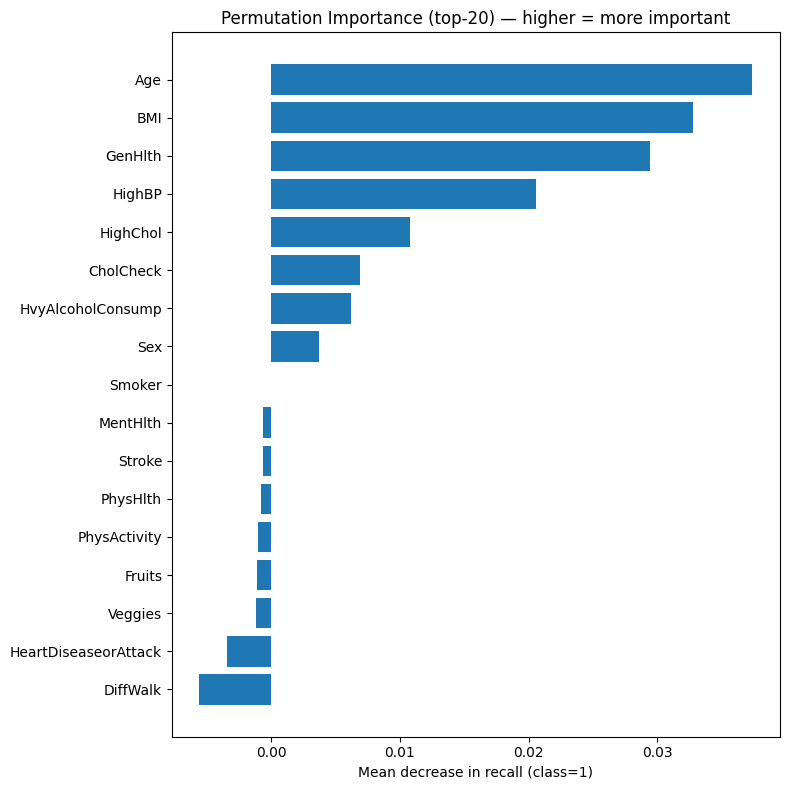

In [12]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import recall_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pre = pipe.named_steps["preprocess"]
xgb_model = pipe.named_steps["model"]
booster = xgb_model.get_booster()

X_test_proc = pre.transform(X_test)


feat_order = booster.feature_names
if feat_order is None:
    feat_order = list(pre.get_feature_names_out())

X_test_proc = X_test_proc[feat_order]
recall_pos = make_scorer(recall_score, pos_label=1)

pfi = permutation_importance(
    estimator=xgb_model,
    X=X_test_proc,
    y=y_test,
    scoring=recall_pos,
    n_repeats=20,
    random_state=42,
    n_jobs=-1
)

pfi_df = pd.DataFrame({
    "feature": feat_order,
    "importance_mean": pfi.importances_mean,
    "importance_std": pfi.importances_std
}).sort_values("importance_mean", ascending=False).reset_index(drop=True)

print("Permutation Feature Importance (scoring=recall_pos, n_repeats=20)")
display(pfi_df.head(30))

top_k = 20
top = pfi_df.head(top_k).iloc[::-1]
plt.figure(figsize=(8, 8))
plt.barh(top["feature"], top["importance_mean"])
plt.xlabel("Mean decrease in recall (class=1)")
plt.title(f"Permutation Importance (top-{top_k}) — higher = more important")
plt.tight_layout()
plt.show()


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 38.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

100%|===================| 23531/23564 [09:10<00:00]       

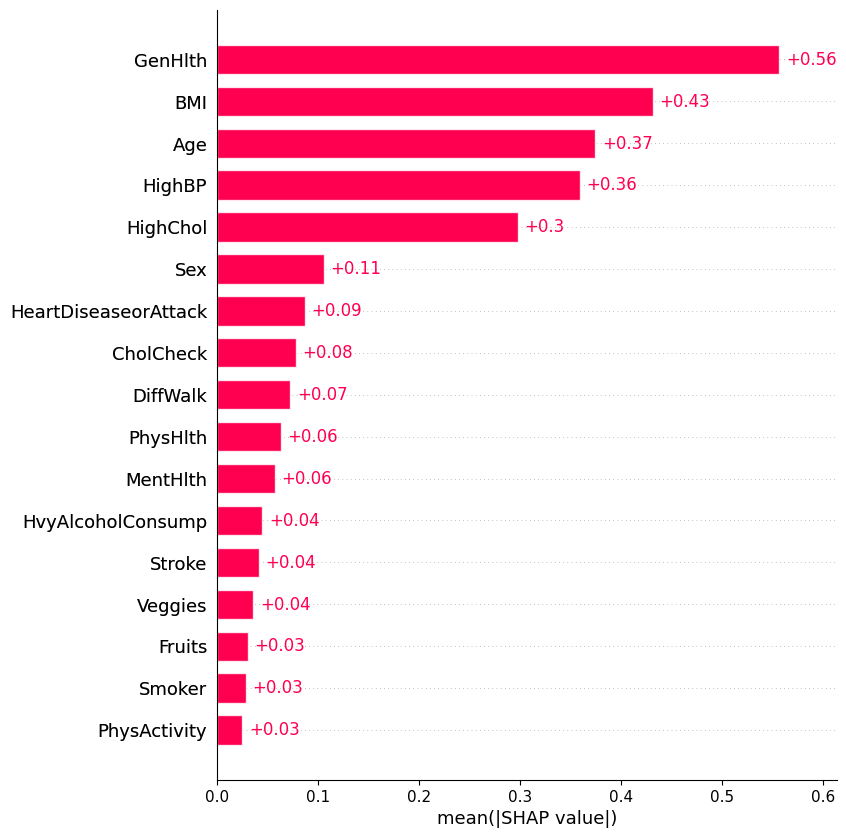

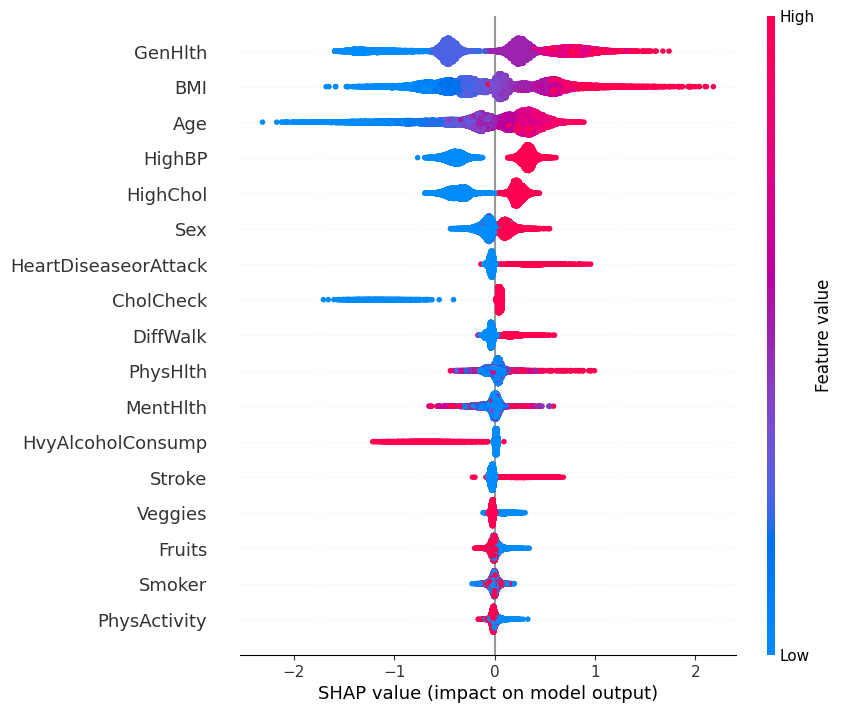

Mostrando explicación local para el índice de prueba: 0


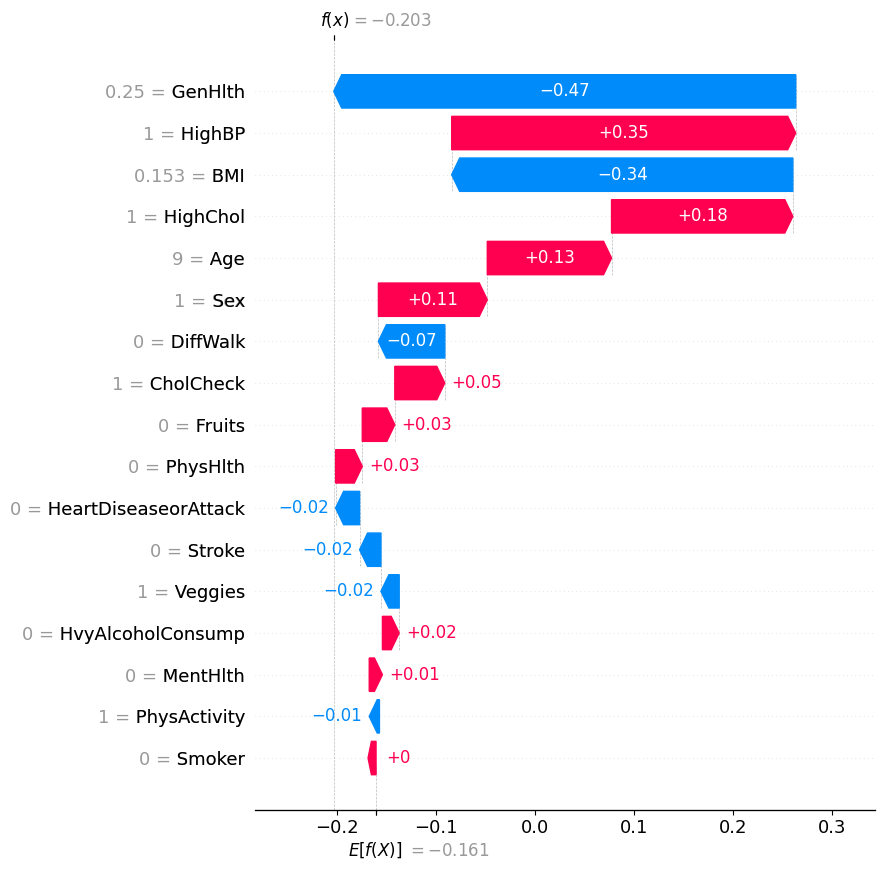

In [13]:
pre = pipe.named_steps["preprocess"]
xgb_model = pipe.named_steps["model"]
booster = xgb_model.get_booster()

X_train_proc = pre.transform(X_train)
X_test_proc  = pre.transform(X_test)

feat_order = booster.feature_names or list(pre.get_feature_names_out())
X_train_proc = X_train_proc[feat_order]
X_test_proc  = X_test_proc[feat_order]


bg_size = min(2000, len(X_train_proc))
background = X_train_proc.sample(bg_size, random_state=42)

explainer = shap.Explainer(xgb_model, background, feature_names=feat_order)

#calcular valores SHAP en el set de prueba
shap_values = explainer(X_test_proc)


shap.plots.bar(shap_values, max_display=20)

shap.plots.beeswarm(shap_values, max_display=20)


try:
    idx_pos = np.where(y_test.values == 1)[0][0]
except IndexError:
    idx_pos = 0

print(f"Mostrando explicación local para el índice de prueba: {idx_pos}")

shap.plots.waterfall(shap_values[idx_pos], max_display=20)

shap.initjs()
shap.force_plot(
    shap_values[idx_pos].base_values,
    shap_values[idx_pos].values,
    X_test_proc.iloc[idx_pos, :],
    feature_names=feat_order
)


Los valores SHAP permiten interpretar cómo cada característica influye en la predicción del modelo para cada paciente. Cada número representa el impacto individual de una variable sobre la probabilidad de tener diabetes: valores positivos (rojos) aumentan el riesgo, mientras que negativos (azules) lo reducen. El valor base indica la predicción promedio del modelo, y la suma de todos los valores SHAP da la predicción final del paciente. En conjunto, los gráficos muestran que factores como presión alta, colesterol alto, edad y peor salud general incrementan significativamente la probabilidad de diabetes, mientras que una mejor salud general y menor IMC la reducen.

Sí, la positividad o negatividad de los valores SHAP tiene un significado claro: los valores positivos indican que una característica aumenta la probabilidad de que el modelo prediga diabetes, mientras que los valores negativos muestran que esa variable reduce dicha probabilidad. En otras palabras, el signo del valor SHAP refleja la dirección del efecto de cada variable sobre la predicción, y su magnitud indica qué tan fuerte es esa influencia en el resultado final.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)


🔍 Aporte local de las variables para la instancia 1


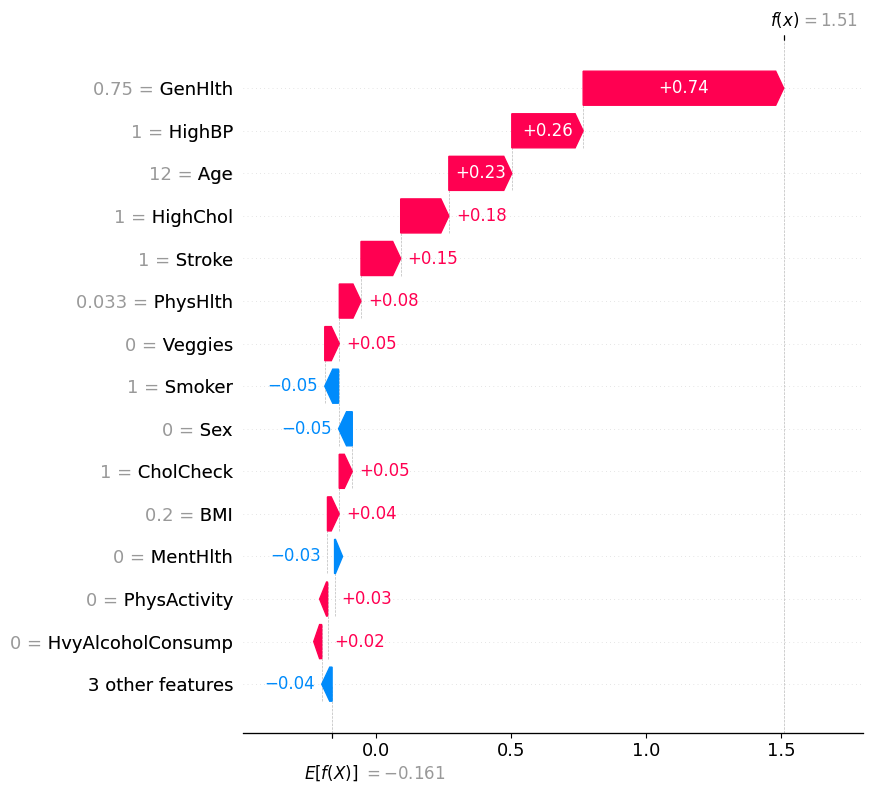


🔍 Aporte local de las variables para la instancia 9


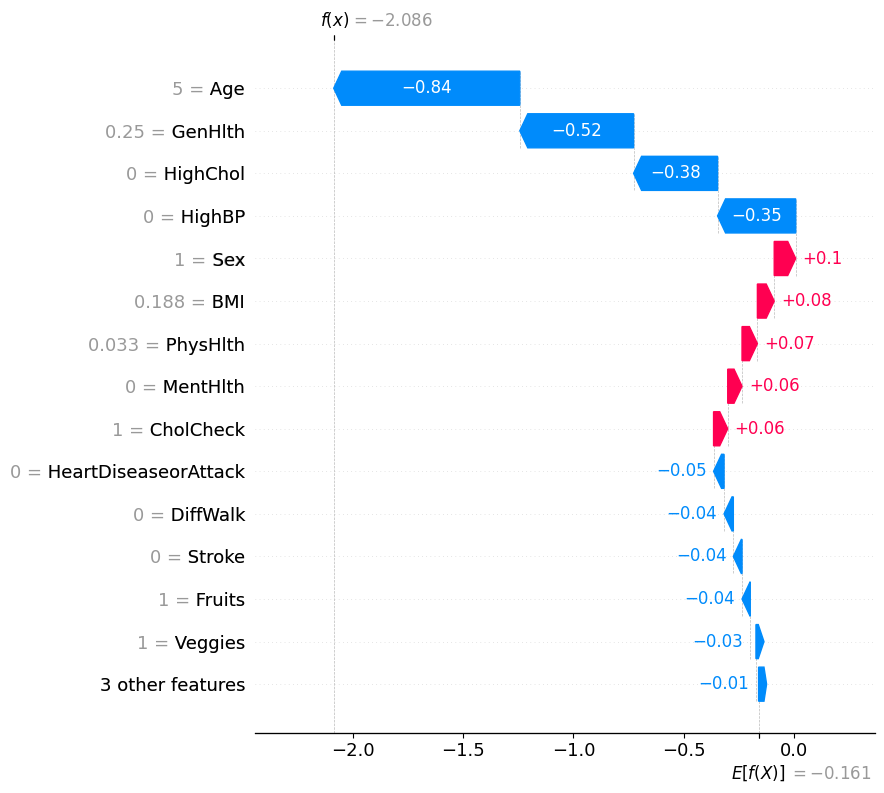


🔍 Aporte local de las variables para la instancia 150


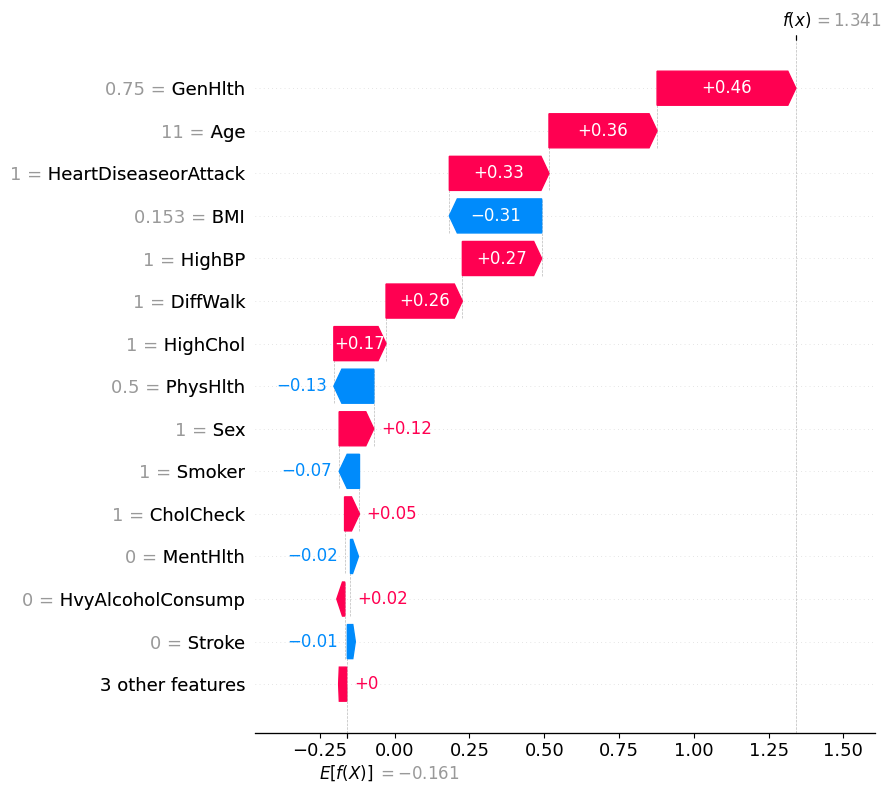

In [14]:
instances = [1, 9, 150]

for i in instances:
    print(f"\n🔍 Aporte local de las variables para la instancia {i}")
    shap.plots.waterfall(shap_values[i], max_display=15)


Las variables que más aumentan la probabilidad de diabetes son la presión alta, colesterol alto, edad elevada y peor salud general, mientras que una buena salud, menor edad y bajo IMC reducen ese riesgo. Entre las tres instancias analizadas se observa un patrón consistente, donde los mismos factores explican el aumento o disminución de la probabilidad. Aunque los valores SHAP son locales, la repetición de estas variables sugiere que estas conclusiones pueden generalizarse al conjunto de datos, reflejando el comportamiento global del modelo.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

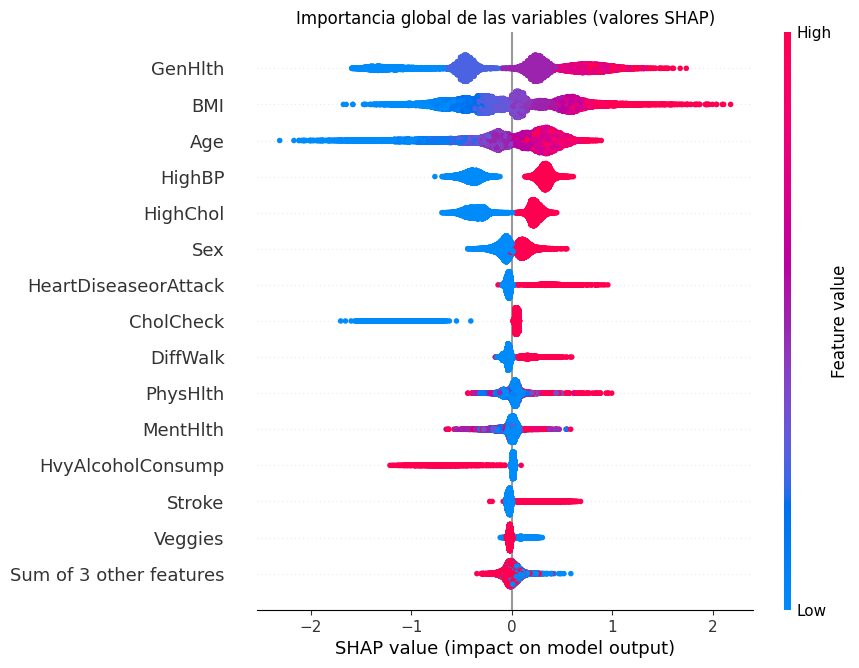

In [15]:
plt.title("Importancia global de las variables (valores SHAP)")
shap.plots.beeswarm(shap_values, max_display=15)

El análisis global de los valores SHAP muestra que las variables con mayor impacto en la predicción de diabetes son la salud general (GenHlth), el índice de masa corporal (BMI), la edad (Age), la presión arterial alta (HighBP) y el colesterol alto (HighChol), todas asociadas positivamente al riesgo de diabetes. En contraste, factores como la actividad física, el consumo de alcohol o la salud mental tienen una influencia menor. A diferencia del análisis local, que explica la predicción de casos individuales, esta visión global permite identificar los patrones promedio del modelo, confirmando que los factores de salud cardiovascular y el estilo de vida son los principales determinantes del riesgo de diabetes en el conjunto total.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

100%|===================| 23531/23564 [10:51<00:00]       

Top-5 features por mean(|SHAP|):
1. GenHlth  (mean|SHAP|=0.1005)
2. BMI  (mean|SHAP|=0.0780)
3. HighBP  (mean|SHAP|=0.0665)
4. Age  (mean|SHAP|=0.0649)
5. HighChol  (mean|SHAP|=0.0532)


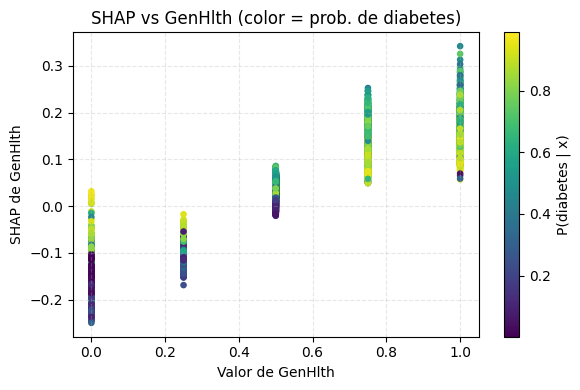

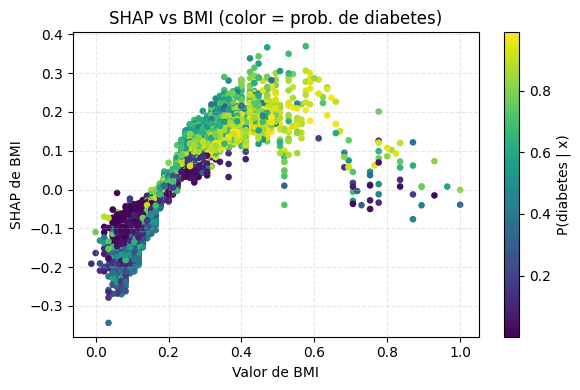

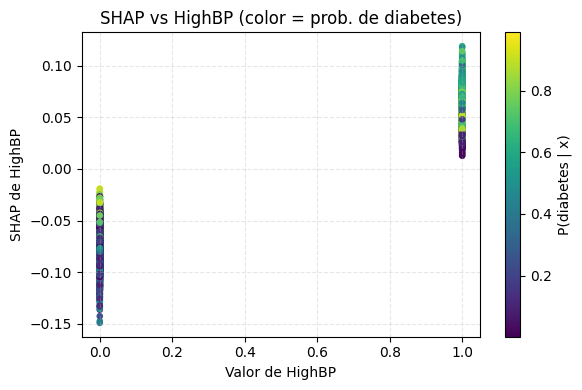

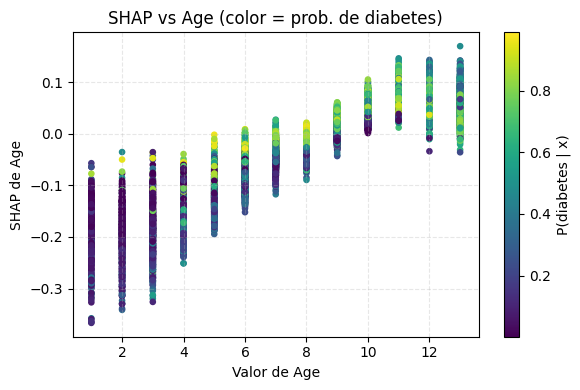

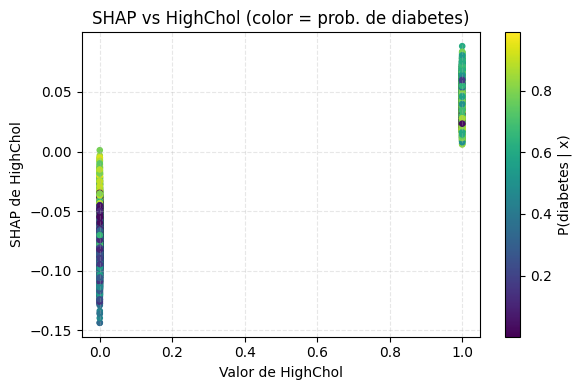

In [16]:


pre = pipe.named_steps["preprocess"]
xgb_model = pipe.named_steps["model"]
booster = xgb_model.get_booster()

X_train_proc = pre.transform(X_train)
X_test_proc  = pre.transform(X_test)

feat_order = booster.feature_names or list(pre.get_feature_names_out())
X_train_proc = X_train_proc[feat_order]
X_test_proc  = X_test_proc[feat_order]

bg_size = min(2000, len(X_train_proc))
background = X_train_proc.sample(bg_size, random_state=42)
explainer = shap.Explainer(xgb_model, background, feature_names=feat_order, model_output="probability")

shap_values = explainer(X_test_proc)

y_proba = pipe.predict_proba(X_test)[:, 1]

shap_matrix = np.asarray(shap_values.values)
feature_names = list(shap_values.feature_names)
mean_abs_shap = np.abs(shap_matrix).mean(axis=0)
top5_idx = np.argsort(mean_abs_shap)[-5:][::-1]
top5_features = [feature_names[i] for i in top5_idx]

print("Top-5 features por mean(|SHAP|):")
for i, f in enumerate(top5_features, 1):
    print(f"{i}. {f}  (mean|SHAP|={mean_abs_shap[top5_idx[i-1]]:.4f})")

for fname, fidx in zip(top5_features, top5_idx):
    x_vals = X_test_proc[fname].values
    y_shap = shap_matrix[:, fidx]

    plt.figure(figsize=(6, 4))
    sc = plt.scatter(x_vals, y_shap, c=y_proba, s=14)
    cbar = plt.colorbar(sc)
    cbar.set_label("P(diabetes | x)")
    plt.xlabel(f"Valor de {fname}")
    plt.ylabel(f"SHAP de {fname}")
    plt.title(f"SHAP vs {fname} (color = prob. de diabetes)")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

Top-5 para PDP: ['GenHlth', 'BMI', 'HighBP', 'Age', 'HighChol']


ValueError: cannot reshape array of size 1 into shape (2)

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [22]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 44.8 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

En la tarea de clasificación de diabetes, los métodos basados en SHAP ofrecen las conclusiones más completas, al combinar alta capacidad predictiva con interpretabilidad tanto global como local, permitiendo identificar qué variables influyen más y cómo afectan cada predicción. Métodos como Permutation Feature Importance y Partial Dependence Plot complementan este análisis mostrando la relevancia y el efecto promedio de las variables. Sin embargo, para el problema del doctor Simi, donde se requiere comprender las razones detrás del diagnóstico de cada paciente, los métodos agnósticos locales (como los valores SHAP individuales) son los más útiles, ya que explican las decisiones del modelo a nivel personal y facilitan la interpretación clínica.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>